# WeightWatcher

https://calculationconsulting.com

In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## 1. Quick start example

### 1.1 Import your model (Keras or PyTorch)

In [2]:
from keras.models import load_model
from keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

Using TensorFlow backend.


### 1.2 Run WeightWatcher

In [3]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze()

2019-03-05 15:51:49,844 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 15:51:49,848 INFO Analyzing model 'vgg16' with 23 layers
2019-03-05 15:51:54,239 INFO ### Printing results ###
2019-03-05 15:51:54,244 INFO LogNorm: min: 0.3889707922935486, max: 1.3697518110275269, avg: 0.5674788951873779
2019-03-05 15:51:54,247 INFO LogNorm compound: min: 0.43449219730165267, max: 1.3697518110275269, avg: 0.6947275543654406


In [4]:
results

{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0x111b08f28>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  0: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 1/9 (3,64): Skipping: too small (<50)'},
  1: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 2/9 (3,64): Skipping: too small (<50)'},
  2: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 3/9 (3,64): Skipping: too small (<50)'},
  3: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 4/9 (3,64): Skipping: too small (<50)'},
  4: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 5/9 (3,64): Skipping: too small (<50)'},
  5: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 6/9 (3,64): Skipping: too small (<50)'},
  6: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 7/9 

In [5]:
watcher.get_summary()

{'lognorm': 0.5674789, 'lognorm_compound': 0.6947275543654406}

In [6]:
watcher.print_results()

2019-03-05 15:51:54,461 INFO ### Printing results ###
2019-03-05 15:51:54,470 INFO LogNorm: min: 0.3889707922935486, max: 1.3697518110275269, avg: 0.5674788951873779
2019-03-05 15:51:54,474 INFO LogNorm compound: min: 0.43449219730165267, max: 1.3697518110275269, avg: 0.6947275543654406


## 2. Advanced examples

## 2.1 Filter by layer type (CONV1D, CONV2D, DENSE)

In this example we are interested in the DENSE layers only

In [7]:
from keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=ww.LAYER_TYPE.DENSE)

2019-03-05 15:52:17,323 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 15:52:17,326 INFO Analyzing model 'vgg16' with 23 layers
2019-03-05 15:52:19,001 INFO ### Printing results ###
2019-03-05 15:52:19,004 INFO LogNorm: min: 1.224208950996399, max: 1.3697518110275269, avg: 1.2832527160644531
2019-03-05 15:52:19,009 INFO LogNorm compound: min: 1.224208950996399, max: 1.3697518110275269, avg: 1.2832527160644531


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb465a47b8>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 2: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb465f04e0>,
  'message': 'Skipping (Layer not supported)'},
 4: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 5: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb4a8709b0>,
  'message': 'Skipping (Layer not supported)'},
 7: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 8: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested

In [8]:
watcher.print_results()

2019-03-05 15:52:19,054 INFO ### Printing results ###
2019-03-05 15:52:19,059 INFO LogNorm: min: 1.224208950996399, max: 1.3697518110275269, avg: 1.2832527160644531
2019-03-05 15:52:19,064 INFO LogNorm compound: min: 1.224208950996399, max: 1.3697518110275269, avg: 1.2832527160644531


## 2.2 Filter by multiple layer types

In this example we are interested in the CONV1D and DENSE layers.

Filter the layers using a bitmask.

In [9]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=ww.LAYER_TYPE.CONV1D|ww.LAYER_TYPE.DENSE)

2019-03-05 15:52:19,108 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 15:52:19,113 INFO Analyzing model 'vgg16' with 23 layers
2019-03-05 15:52:20,761 INFO ### Printing results ###
2019-03-05 15:52:20,764 INFO LogNorm: min: 1.224208950996399, max: 1.3697518110275269, avg: 1.2832527160644531
2019-03-05 15:52:20,768 INFO LogNorm compound: min: 1.224208950996399, max: 1.3697518110275269, avg: 1.2832527160644531


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb465a47b8>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 2: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb465f04e0>,
  'message': 'Skipping (Layer not supported)'},
 4: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 5: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb4a8709b0>,
  'message': 'Skipping (Layer not supported)'},
 7: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 8: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested

## 2.3 Filter by layer Ids

In [10]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=[20])

2019-03-05 15:52:20,843 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 15:52:20,848 INFO Analyzing model 'vgg16' with 23 layers
2019-03-05 15:52:22,373 INFO ### Printing results ###
2019-03-05 15:52:22,378 INFO LogNorm: min: 1.3697518110275269, max: 1.3697518110275269, avg: 1.3697518110275269
2019-03-05 15:52:22,383 INFO LogNorm compound: min: 1.3697518110275269, max: 1.3697518110275269, avg: 1.3697518110275269


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb465a47b8>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 1: {'id': 1,
  'type': <keras.layers.convolutional.Conv2D at 0xb465df668>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 2: {'id': 2,
  'type': <keras.layers.convolutional.Conv2D at 0xb465df550>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb465f04e0>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 4: {'id': 4,
  'type': <keras.layers.convolutional.Conv2D at 0xb465f0358>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 5: {'id': 5,
  'type': <keras.layers.convolutional.Conv2D at 0xb4a864c88>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb4a8709b0>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 7: {'id': 7,
  'type': <keras.l

## 2.4 Get the return values per layer

In [11]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze()

2019-03-05 15:52:22,452 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 15:52:22,458 INFO Analyzing model 'vgg16' with 23 layers
2019-03-05 15:52:24,957 INFO ### Printing results ###
2019-03-05 15:52:24,961 INFO LogNorm: min: 0.3889707922935486, max: 1.3697518110275269, avg: 0.5674788951873779
2019-03-05 15:52:24,965 INFO LogNorm compound: min: 0.43449219730165267, max: 1.3697518110275269, avg: 0.6947275543654406


In [12]:
for layer_id, result in results.items():
    for slice_id, summary in result.items():
        if not str(slice_id).isdigit() or "lognorm" not in summary:
            continue
        lognorm = summary["lognorm"]
        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))    

Layer 2, Slice 0: Lognorm: 0.3978934586048126
Layer 2, Slice 1: Lognorm: 0.45358702540397644
Layer 2, Slice 2: Lognorm: 0.40578144788742065
Layer 2, Slice 3: Lognorm: 0.45428669452667236
Layer 2, Slice 4: Lognorm: 0.49695152044296265
Layer 2, Slice 5: Lognorm: 0.45737624168395996
Layer 2, Slice 6: Lognorm: 0.4044671952724457
Layer 2, Slice 7: Lognorm: 0.4511153995990753
Layer 2, Slice 8: Lognorm: 0.3889707922935486
Layer 4, Slice 0: Lognorm: 0.44109997153282166
Layer 4, Slice 1: Lognorm: 0.4613628089427948
Layer 4, Slice 2: Lognorm: 0.4370166063308716
Layer 4, Slice 3: Lognorm: 0.4667660593986511
Layer 4, Slice 4: Lognorm: 0.5201410055160522
Layer 4, Slice 5: Lognorm: 0.46935534477233887
Layer 4, Slice 6: Lognorm: 0.4464665651321411
Layer 4, Slice 7: Lognorm: 0.48161619901657104
Layer 4, Slice 8: Lognorm: 0.4471622705459595
Layer 5, Slice 0: Lognorm: 0.45507872104644775
Layer 5, Slice 1: Lognorm: 0.4839082956314087
Layer 5, Slice 2: Lognorm: 0.4593982994556427
Layer 5, Slice 3: Lognorm

## 2.5 Power Law Fit

In [13]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

2019-03-05 15:52:25,038 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 15:52:25,042 INFO Analyzing model 'vgg16' with 23 layers
2019-03-05 16:16:38,743 INFO ### Printing results ###
2019-03-05 16:16:38,747 INFO LogNorm: min: 0.3889707922935486, max: 1.3697518110275269, avg: 0.5674788951873779
2019-03-05 16:16:38,751 INFO LogNorm compound: min: 0.43449219730165267, max: 1.3697518110275269, avg: 0.6947275543654406
2019-03-05 16:16:38,755 INFO Alpha: min: 1.2069767289907984, max: 4.558138051733277, avg: 2.7189645499931947
2019-03-05 16:16:38,757 INFO Alpha compound: min: 1.2176341122821663, max: 3.960301663164957, avg: 2.6610037890312737
2019-03-05 16:16:38,761 INFO Alpha Weigh

## 2.6 Debug and Custom Logging

### Custom Logging at Debug Level

In [14]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

import weightwatcher as ww

watcher = ww.WeightWatcher(model=model, logger=logger)

results = watcher.analyze()

INFO:__main__:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:__main__:Analyzing model 'vgg16' with 23 layers
DEBUG:__main__:Layer 1: <keras.engine.input_layer.InputLayer object at 0xb465a47b8>
DEBUG:__main__:Layer 1: Skipping (Layer not supported)
DEBUG:__main__:Layer 2: <keras.layers.convolutional.Conv2D object at 0xb465df668>
DEBUG:__main__:Keras tensor shape detected: 3x64 (NxM), 3x3 (i,j)
DEBUG:__main__:Layer 2: Analyzing 9 weight matrices...
DEBUG:__main__:    Weight matrix 1/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:    Weight matrix 2/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:    Weight matrix 3/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:    Weight matr

DEBUG:__main__:    Weight matrix 5/9 (256,256): Lognorm: 0.5939016342163086
DEBUG:__main__:    Weight matrix 6/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 6/9 (256,256): Lognorm: 0.5075631737709045
DEBUG:__main__:    Weight matrix 7/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 7/9 (256,256): Lognorm: 0.45727992057800293
DEBUG:__main__:    Weight matrix 8/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 8/9 (256,256): Lognorm: 0.5017167329788208
DEBUG:__main__:    Weight matrix 9/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 9/9 (256,256): Lognorm: 0.4612100124359131
DEBUG:__main__:Layer 10: <keras.layers.convolutional.Conv2D object at 0xb4a8eb550>
DEBUG:__main__:Keras tensor shape detected: 256x256 (NxM), 3x3 (i,j)
DEBUG:__main__:Layer 10: Analyzing 9 weight matrices...
DEBUG:__main__:    Weight matrix 1/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 1/9 (256,256): Lognorm: 0.4767092168331146
DEBUG:__main__:    Weight

DEBUG:__main__:Keras tensor shape detected: 512x512 (NxM), 3x3 (i,j)
DEBUG:__main__:Layer 17: Analyzing 9 weight matrices...
DEBUG:__main__:    Weight matrix 1/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 1/9 (512,512): Lognorm: 0.6483020782470703
DEBUG:__main__:    Weight matrix 2/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 2/9 (512,512): Lognorm: 0.6716188788414001
DEBUG:__main__:    Weight matrix 3/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 3/9 (512,512): Lognorm: 0.6487486958503723
DEBUG:__main__:    Weight matrix 4/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 4/9 (512,512): Lognorm: 0.6313163042068481
DEBUG:__main__:    Weight matrix 5/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 5/9 (512,512): Lognorm: 0.690161406993866
DEBUG:__main__:    Weight matrix 6/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 6/9 (512,512): Lognorm: 0.6324495077133179
DEBUG:__main__:    Weight matrix 7/9 (512,512): 

### Disable Logging

In [15]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model, log=False)

results = watcher.analyze()

## 3. pyTorch Models

In [16]:
data = []

In [17]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg16(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg16torch", "summary": watcher.get_summary()})

2019-03-05 16:16:52,227 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 16:16:52,233 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-03-05 16:40:17,645 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-03-05 16:40:17,652 INFO LogNorm

In [18]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg16_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg16bntorch", "summary": watcher.get_summary()})

2019-03-05 16:40:25,451 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 16:40:25,456 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-03-05 17:03:30,458 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-03-05 17:03:30,486 INFO LogNorm

In [19]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg11(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg11torch", "summary": watcher.get_summary()})

2019-03-05 17:03:37,785 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 17:03:37,791 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-03-05 17:24:26,858 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-03-05 17:24:26,867 INFO LogNorm

In [20]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg11_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg11bntorch", "summary": watcher.get_summary()})

2019-03-05 17:24:34,149 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 17:24:34,158 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-03-05 17:45:08,245 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-03-05 17:45:08,251 INFO LogNorm

In [21]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg13(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg13torch", "summary": watcher.get_summary()})

2019-03-05 17:45:16,034 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 17:45:16,039 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-03-05 18:07:07,694 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-03-05 18:07:07,701 INFO LogNorm

In [22]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg13_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg13bntorch", "summary": watcher.get_summary()})

2019-03-05 18:07:15,010 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 18:07:15,016 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-03-05 18:28:16,260 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-03-05 18:28:16,269 INFO LogNorm

In [23]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg19(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg19torch", "summary": watcher.get_summary()})

2019-03-05 18:28:25,556 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 18:28:25,569 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-03-05 18:52:13,754 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-03-05 18:52:13,759 INFO LogNorm

In [24]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg19_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg19bntorch", "summary": watcher.get_summary()})

2019-03-05 18:52:21,113 INFO 
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.15.4
tensforflow version 1.12.0
keras       version 2.2.4
2019-03-05 18:52:21,118 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-03-05 19:16:03,343 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-03-05 19:16:03,349 INFO LogNorm

In [25]:
data

[{'name': 'vgg16torch',
  'summary': {'lognorm': 0.838187,
   'lognorm_compound': 0.979278251418361,
   'alpha': 2.892337732378665,
   'alpha_compound': 2.7677175818365836,
   'alpha_weighted': 1.4050729205741441,
   'alpha_weighted_compound': 1.7930748687925522}},
 {'name': 'vgg16bntorch',
  'summary': {'lognorm': 0.77009755,
   'lognorm_compound': 0.9220763058574111,
   'alpha': 3.099085549447262,
   'alpha_compound': 2.966024319976765,
   'alpha_weighted': 1.082040326171031,
   'alpha_weighted_compound': 1.5490585712532523}},
 {'name': 'vgg11torch',
  'summary': {'lognorm': 0.94749826,
   'lognorm_compound': 1.138647382789188,
   'alpha': 2.5724933905622995,
   'alpha_compound': 2.537004676079584,
   'alpha_weighted': 1.843995284787769,
   'alpha_weighted_compound': 2.4581931742301806}},
 {'name': 'vgg11bntorch',
  'summary': {'lognorm': 0.8902592,
   'lognorm_compound': 1.0959334148301019,
   'alpha': 2.746966353088615,
   'alpha_compound': 2.638103917249632,
   'alpha_weighted': 1

In [26]:
# pytorch Model accuracies 
# https://github.com/Cadene/pretrained-models.pytorch

accuracies = {
    "vgg11torch": 68.970,
    "vgg11bntorch": 70.452,
    "vgg13torch": 69.662,
    "vgg13bntorch": 71.508,
    "vgg16torch": 71.636,
    "vgg16bntorch": 73.518,
    "vgg19torch": 72.080,
    "vgg19bntorch": 74.266,
}

In [27]:
# pytorch Model accuracies 
# https://github.com/Cadene/pretrained-models.pytorch

accuracies5 = {
    "vgg11torch": 88.746,
    "vgg11bntorch": 89.818,
    "vgg13torch": 89.264,
    "vgg13bntorch": 90.494,
    "vgg16torch": 90.354,
    "vgg16bntorch": 91.608,
    "vgg19torch": 90.822,
    "vgg19bntorch": 92.066,
}

### 3.1 Log Norm of Weight Matrices vs Accuracies of models

The following graph demonstrates the linear relationship between the average Log Norm of Weight matrices and the test accuracies of the models (notice we didnt't need the test data):

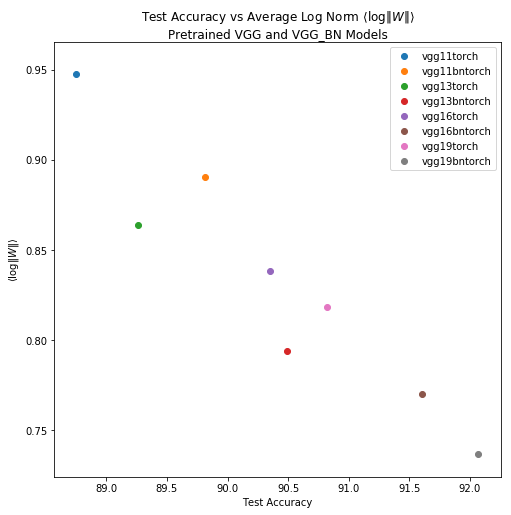

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

for modelname, accuracy in accuracies5.items():
    x = accuracy
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y = summary[0]["lognorm"]
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Average Log Norm $\langle\log\Vert W\Vert\rangle$"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"$\langle\log\Vert W\Vert\rangle$");

Let's compare the average Log Norm with the average Log Norm compound:

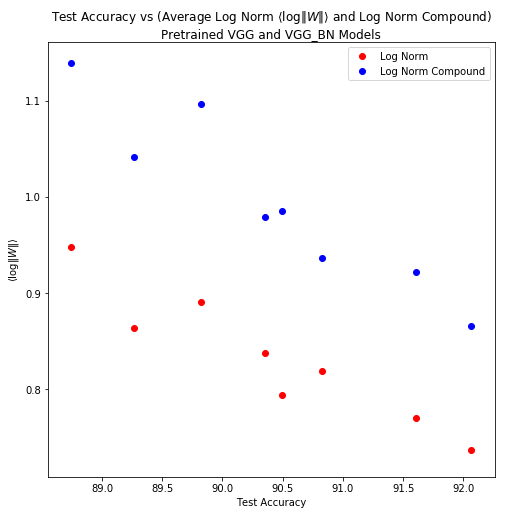

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

x = []
y1, y2 = [], []
for modelname, accuracy in accuracies5.items():
    x.append(accuracy)
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y1.append(summary[0]["lognorm"])
    y2.append(summary[0]["lognorm_compound"])
    label = modelname
plt.scatter(x,y1,label="Log Norm", color='r')
plt.scatter(x,y2,label="Log Norm Compound", color='b')

plt.legend()
plt.title(r"Test Accuracy vs (Average Log Norm $\langle\log\Vert W\Vert\rangle$ and Log Norm Compound)"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"$\langle\log\Vert W\Vert\rangle$");

### 3.2 Power law fitting (Alpha) of Weight Matrices vs Accuracies of models

The linear relationship between the Power law fitting (Alpha) of the weight matrices and the accuracies of the models is demonstrated in the following graph:

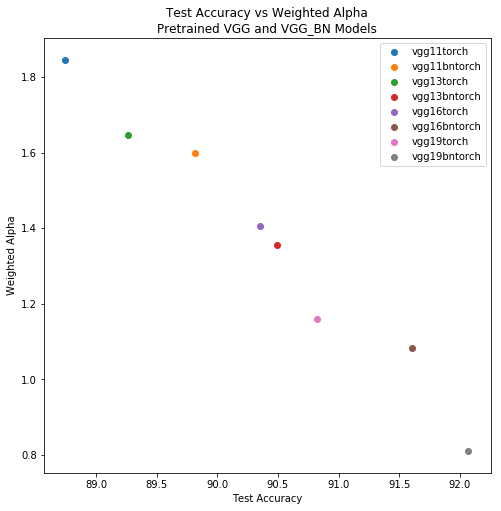

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

for modelname, accuracy in accuracies5.items():
    x = accuracy
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y = summary[0]["alpha_weighted"]
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Weighted Alpha"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Weighted Alpha");

The more accurate the model, the lower the exponent of the power law fit of the weight matrices is.

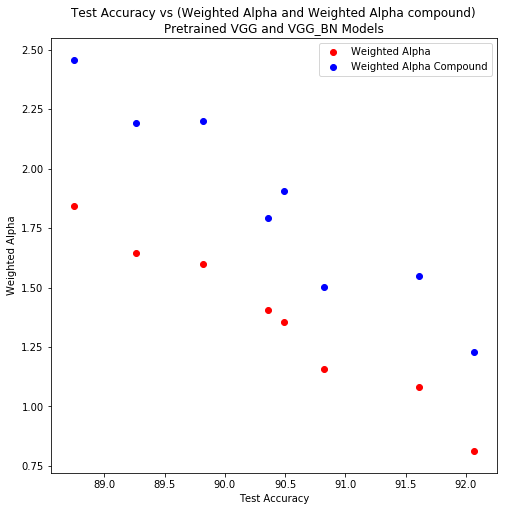

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

x = []
y1, y2 = [], []
for modelname, accuracy in accuracies5.items():
    x.append(accuracy)
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y1.append(summary[0]["alpha_weighted"])
    y2.append(summary[0]["alpha_weighted_compound"])
plt.scatter(x,y1,label="Weighted Alpha", color='r')
plt.scatter(x,y2,label="Weighted Alpha Compound", color='b')

plt.legend()
plt.title(r"Test Accuracy vs (Weighted Alpha and Weighted Alpha compound)"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Weighted Alpha");

## 4. Conclusion

WeightWatcher helps you choose the best pretrained model for your needs.

You can use WeightWatcher to compare several pretrained models and choose the one with the lowest Log Norm.